In [1]:
from gensim.models import KeyedVectors
import pandas as pd
 
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans

# 1.Importing all the libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy.stats import randint
from gensim.models import KeyedVectors
import re
import nltk
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords 
from imblearn.under_sampling import RandomUnderSampler
import string
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn import neighbors
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D, CuDNNLSTM, concatenate
from keras.layers import Bidirectional, GlobalMaxPool1D, Dropout, SpatialDropout1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.optimizers import SGD
from gensim.models.doc2vec import LabeledSentence
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from keras.optimizers import RMSprop
from tensorflow import keras
import multiprocessing
cores = multiprocessing.cpu_count()
# from tqdm import tqdm
# tqdm.pandas(desc="progress-bar")
from sklearn import utils
from keras.utils import to_categorical
import warnings
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import TweetTokenizer
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
# import emoji
!pip install contractions
import contractions
from sklearn.metrics import classification_report
import os
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from os.path import join, exists
from keras.utils.data_utils import get_file
import sys
import time
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN
from collections import Counter
from collections import defaultdict
warnings.filterwarnings("ignore")


Using TensorFlow backend.
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
# function to extract only words, by excluding punctuation and other symbols
def clean_data(review):
    review = review.lower() # convert text to lower-case
    review = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', review) # remove URLs
    review = re.sub('@[^\s]+', 'AT_USER', review) # remove usernames
    review = re.sub(r'#([^\s]+)', r'\1', review) # remove the # in #hashtag
    review = re.sub(r'\W', ' ', review) # Remove all the special characters
    review= re.sub(r'\s+[a-zA-Z]\s+', ' ', review)  # remove all single characters  
    review = re.sub(r'\^[a-zA-Z]\s+', ' ', review)  # Remove single characters from the start
    review = re.sub(r'\s+', ' ', review, flags=re.I)# Substituting multiple spaces with single space
    review =  re.sub(r"\d", "", review) #Removing Digits
    review = re.sub(r"^\s+", "", review) #Removing Spaces from Start and End
    review = contractions.fix(review) #to change words like "don't" to "do not"
    review = re.sub("([^\x00-\x7F])+"," ",review) #removing non-english words
#     review = word_tokenize(review) 
#     review = remove_stop_words(review) #remove stop words
#     review = ' '.join(review)
    return review

def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
    
    return np.asarray(sent_vec) / numw
 

In [3]:
def tfidf(X_train):    
    vectorizer = TfidfVectorizer ()
    vectorizer.fit(X_train)
    train_features_cv = vectorizer.transform(X_train)
    return train_features_cv

In [4]:
Data_path = 'C:/python files/NLP/project/questions_task2.csv'
Data = pd.read_csv(Data_path)
Data.drop(Data[Data.isnull().any(axis=1)].index,inplace=True)
Data['questions'] = Data.questions.apply(clean_data)
# Data['questions'] = Data.questions.apply(tokenize_text)
# sentences = Data['questions'].tolist()

In [5]:
sentences_tf = tfidf(Data['questions'].values)

In [6]:
X = sentences_tf

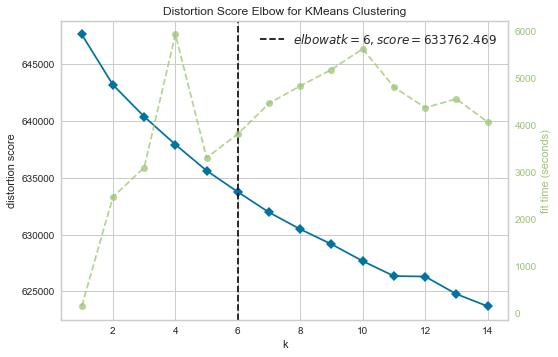

In [26]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
# X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,15))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show() 

In [27]:
from sklearn import cluster
from sklearn import metrics
NUM_CLUSTERS=6
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
# print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
# print (kmeans.score(X))
 


Cluster id labels for inputted data
[5 5 4 ... 0 0 0]
Centroids data
Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):


In [ ]:
# storing the data/lists as binary data stream

import pickle

with open('TFIDF_labels_cluterings.txt', 'wb') as filehandle:
    pickle.dump(labels, filehandle)

In [32]:
# # storing the data/lists as binary data stream

# import pickle

# with open('X_TFIDF.txt', 'wb') as filehandle:
#     pickle.dump(X.toarray(), filehandle)

MemoryError: Unable to allocate array with shape (659390, 78511) and data type float64

In [7]:
##Reading back lists with pickle


import pickle

with open('TFIDF_labels_cluterings.txt', 'rb') as filehandle:
    # read the data as binary data stream
    labels = pickle.load(filehandle)

In [28]:
# import pandas as pd
# import numpy as np
# from sklearn.cluster import MiniBatchKMeans
# from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

random_state = 0 
# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(X)
clf = TruncatedSVD(100)
Xpca = clf.fit_transform(X)

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(kmeans.cluster_centers_)

TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.

In [ ]:
# import itertools

colormap = np.array(['r', 'g', 'b'])
plt.rcParams['axes.facecolor'] = 'green'
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=kmeans.predict(X))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c="b")
plt.title('Data points and cluster centroids')
plt.show()

In [8]:
Davies_Bouldin_Index = metrics.davies_bouldin_score(X.toarray(), labels)
 
print ("Davies-Bouldin Index: ")
print (Davies_Bouldin_Index)

MemoryError: Unable to allocate array with shape (659390, 78511) and data type float64

In [ ]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)